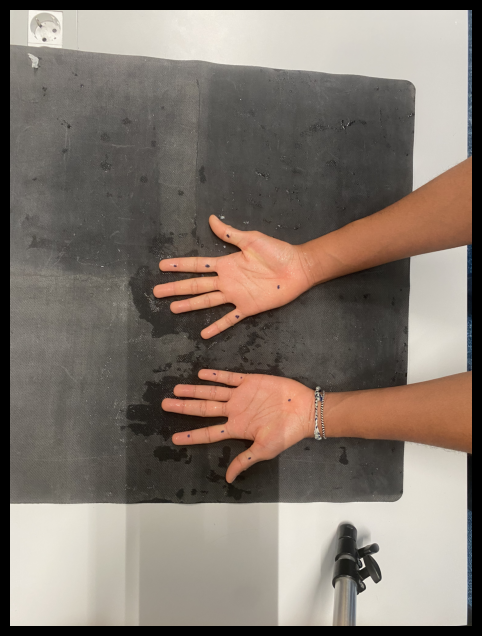

In [2]:
from PIL import Image
import pillow_heif
import matplotlib.pyplot as plt

# Register HEIF opener with Pillow
pillow_heif.register_heif_opener()

# Load the HEIC image
image_path = '/home/user/Desktop/RP/datasets/ourData/Data/Dataset/RGB images/IMG_4612.HEIC'
image = Image.open(image_path)

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

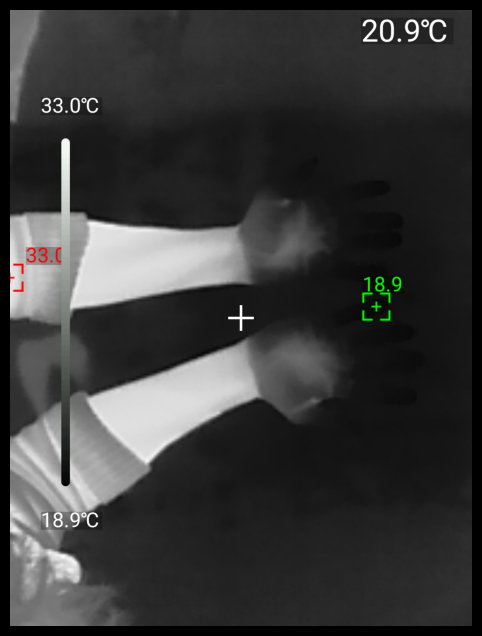

In [3]:
# Load and preview the image
image_path = '/home/user/Desktop/RP/datasets/ourData/Data/Dataset/IR images/IMG20241127105250.jpg'
image = Image.open(image_path)

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis('off')
plt.show()



In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import ipywidgets as widgets
from IPython.display import display


original_image = Image.open(image_path).convert('L')

def update_image(brightness=1.0, contrast=1.0, clip_limit=2.0, tile_grid_size=8, canny_threshold1=100, canny_threshold2=200):
    # Convert to OpenCV format
    img = np.array(original_image)
    
    # Apply brightness and contrast
    img_pil = Image.fromarray(img)
    img_pil = ImageEnhance.Brightness(img_pil).enhance(brightness)
    img_pil = ImageEnhance.Contrast(img_pil).enhance(contrast)
    img = np.array(img_pil)
    
    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(tile_grid_size, tile_grid_size))
    img_clahe = clahe.apply(img)
    
    # Apply Canny edge detection
    edges = cv2.Canny(img_clahe, canny_threshold1, canny_threshold2)
    
    # Display the image
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.title('Enhanced Image')
    plt.imshow(img_clahe, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title('Edges')
    plt.imshow(edges, cmap='gray')
    plt.axis('off')
    
    plt.show()

# Create sliders
brightness_slider = widgets.FloatSlider(value=1.0, min=0.0, max=2.0, step=0.1, description='Brightness')
contrast_slider = widgets.FloatSlider(value=1.0, min=0.0, max=2.0, step=0.1, description='Contrast')
clip_limit_slider = widgets.FloatSlider(value=2.0, min=1.0, max=4.0, step=0.1, description='CLAHE Clip Limit')
tile_grid_size_slider = widgets.IntSlider(value=8, min=1, max=16, step=1, description='CLAHE Tile Size')
canny_threshold1_slider = widgets.IntSlider(value=100, min=0, max=255, step=1, description='Canny Thresh1')
canny_threshold2_slider = widgets.IntSlider(value=200, min=0, max=255, step=1, description='Canny Thresh2')

# Create interactive widget
interactive_widget = widgets.interactive(update_image, 
                                         brightness=brightness_slider,
                                         contrast=contrast_slider,
                                         clip_limit=clip_limit_slider,
                                         tile_grid_size=tile_grid_size_slider,
                                         canny_threshold1=canny_threshold1_slider,
                                         canny_threshold2=canny_threshold2_slider)

display(interactive_widget)

interactive(children=(FloatSlider(value=1.0, description='Brightness', max=2.0), FloatSlider(value=1.0, descri…

In [12]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 69.4 MB/s eta 0:00:00
